# Threshold determination (using the two-way holdout method)

Threshold: 0.0 | Accuracy: 0.5267
Threshold: 0.1 | Accuracy: 0.7100
Threshold: 0.2 | Accuracy: 0.8233
Threshold: 0.3 | Accuracy: 0.8567
Threshold: 0.4 | Accuracy: 0.8867
Threshold: 0.5 | Accuracy: 0.8833
Threshold: 0.6 | Accuracy: 0.8767
Threshold: 0.7 | Accuracy: 0.8567
Threshold: 0.8 | Accuracy: 0.7933
Threshold: 0.9 | Accuracy: 0.7033
Threshold: 1.0 | Accuracy: 0.4733


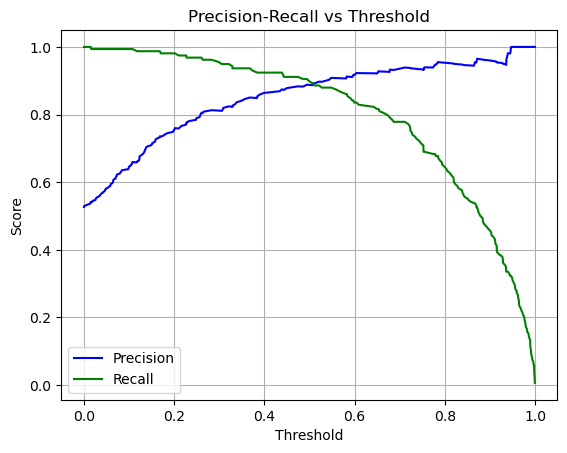

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve

# Step 1: Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train a classifier (Logistic Regression in this case)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Step 3: Get predicted probabilities
y_probs = classifier.predict_proba(X_test)[:, 1]  # Probability of positive class

# Step 4: Define a function to evaluate performance at different thresholds
def evaluate_thresholds(y_true, y_probs):
    thresholds = np.arange(0.0, 1.1, 0.1)
    scores = []

    for threshold in thresholds:
        # Classify based on the current threshold
        y_pred = (y_probs >= threshold).astype(int)
        accuracy = accuracy_score(y_true, y_pred)
        scores.append((threshold, accuracy))

    return scores

# Step 5: Evaluate and print the scores for each threshold
scores = evaluate_thresholds(y_test, y_probs)
for threshold, accuracy in scores:
    print(f"Threshold: {threshold:.1f} | Accuracy: {accuracy:.4f}")

# Step 6: Plotting Precision-Recall curve and optimal threshold determination
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], 'b', label='Precision')
plt.plot(thresholds, recall[:-1], 'g', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc='best')
plt.grid()
plt.show()


# Threshold determination (using the three-way holdout method)

Best Threshold on Validation Set: 0.50 | Accuracy: 0.8900
Test Set Accuracy with Best Threshold: 0.8850


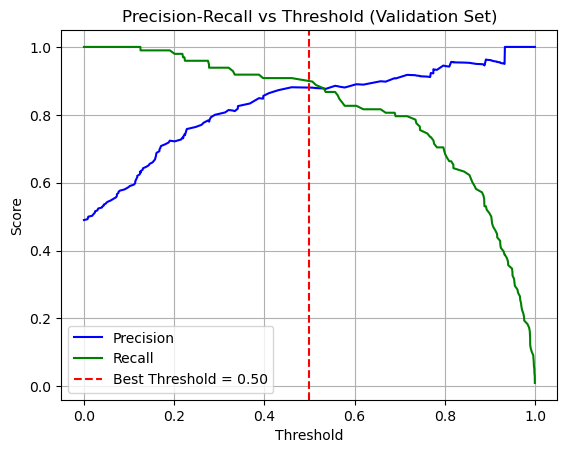

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve

# Step 1: Create a synthetic dataset and split into training, validation, and test sets
X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=0, random_state=42)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Train a classifier (Logistic Regression in this case)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Step 3: Get predicted probabilities for the validation set
y_val_probs = classifier.predict_proba(X_val)[:, 1]  # Probability of positive class

# Step 4: Define a function to evaluate performance at different thresholds on the validation set
def evaluate_thresholds(y_true, y_probs):
    thresholds = np.arange(0.0, 1.1, 0.1)
    scores = []

    for threshold in thresholds:
        y_pred = (y_probs >= threshold).astype(int)
        accuracy = accuracy_score(y_true, y_pred)
        scores.append((threshold, accuracy))

    return scores

# Step 5: Evaluate and find the optimal threshold on the validation set
scores = evaluate_thresholds(y_val, y_val_probs)
best_threshold, best_accuracy = max(scores, key=lambda x: x[1])
print(f"Best Threshold on Validation Set: {best_threshold:.2f} | Accuracy: {best_accuracy:.4f}")

# Step 6: Evaluate the chosen threshold on the test set
y_test_probs = classifier.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_probs >= best_threshold).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy with Best Threshold: {test_accuracy:.4f}")

# Step 7: (Optional) Plot Precision-Recall curve for validation set
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_val, y_val_probs)

plt.plot(thresholds, precision[:-1], 'b', label='Precision')
plt.plot(thresholds, recall[:-1], 'g', label='Recall')
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold (Validation Set)')
plt.legend(loc='best')
plt.grid()
plt.show()